In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set_style("whitegrid")

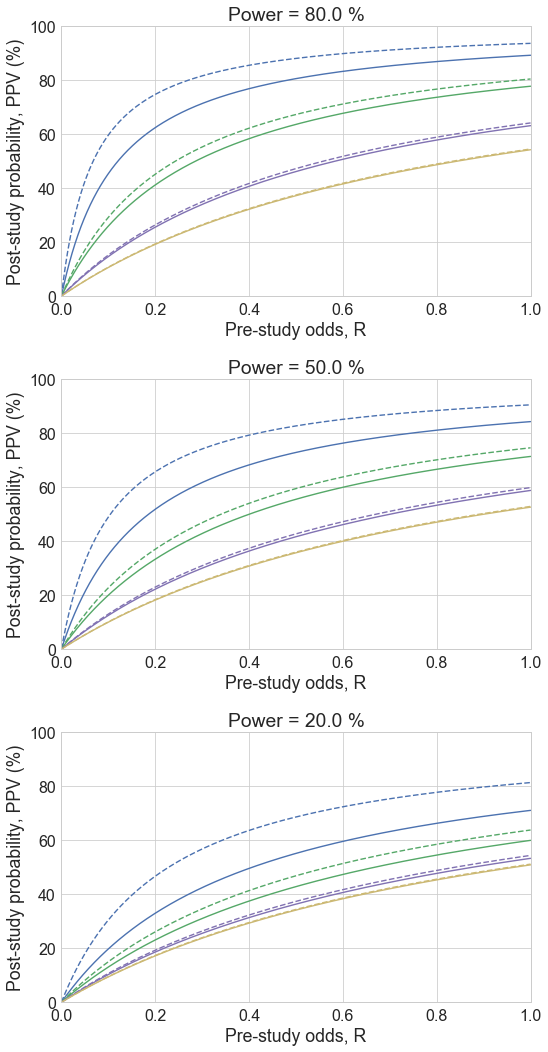

In [9]:
bias_vals =  [0.05, 0.2, 0.5, 0.8]
power_vals = [0.8, 0.5, 0.2]
fig = plt.figure(figsize=(8,15))

for power, plot_num in zip(power_vals, [1,2,3]):
    PPV = pd.DataFrame(columns = ['0.05', '0.2','0.5' '0.8'])
    for alpha in [0.05, 0.005]:
        for bias, col in zip(bias_vals,[0,1,2,3]):
            beta = 1 - power
            R = np.arange(0, 1, 0.0001)
            PPV[str(bias)] = np.array(([1-beta]*R+bias*beta*R)/(R*(1-beta)+bias*beta*R+alpha+bias*(1-alpha))*100)
            
        # plot the results, try to match Ionnadis style

        if alpha == 0.005:
            linestyle='--'
        else:
            linestyle='-'
        ax=plt.subplot(3,1,plot_num)
        plt.plot(R, PPV, ls=linestyle)
        plt.xlabel('Pre-study odds, R')
        plt.ylabel('Post-study probability, PPV (%)')
        plt.xlim(0,1)
        plt.ylim(0,100)
        plt.gca().set_prop_cycle(None)
        sns.set_context(context='paper', font_scale=2.0)
        plt.axis([-0.0, 1, 0, 100])
        plt.yticks(np.arange(0,100.1,20))
        plt.xticks(np.arange(0,1.1,.2))
        plt.title('Power = %s %%' % (str(power*100)))
    
fig.tight_layout()            
plt.savefig('/Users/plb/Dropbox/sims.svg')